In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def split_objective(input_df, dims):
    features = input_df.loc[:, input_df.columns != list(dims.keys())[-1]]
    objective = input_df[input_df.columns[-1:]]
    return (features, objective)

In [2]:
dimensiones = {
    'P31_El_Recreo': 'int',
    'P31_La_Refaccion_Escolar': 'int',
    'P31_Platicar_Con_Mis_Amigos': 'int',
    'P31_Aprender_Algo_Nuevo': 'int',
    'P31_Platicar_Con_Mis_Maestros': 'int',
    'P31_Me_Gustan_Las_Clases': 'int',
    'P31_Actividades_Deportes': 'int',
    'P31_Clases_Musica': 'int',
    'P31_Clases_Arte': 'int',
    'P31_Clases_Computación': 'int',
    'LOGRO_MATE': 'int'
}
df = pd.read_csv(
        '6to.csv',
        encoding = "ISO-8859-1",
        usecols=list(dimensiones.keys()),
        dtype=dimensiones)
print(df.shape)

(18418, 11)


In [23]:
df_pass = df[df['LOGRO_MATE'] == 1]
print(df_pass.shape)
print(len(df_pass))

(8403, 11)
8403


In [26]:
grupos = df.groupby(by=('LOGRO_MATE', 'P31_Clases_Computación'))
convertido = pd.DataFrame({'total': grupos.size()}).reset_index()
print(convertido)

   LOGRO_MATE  P31_Clases_Computación  total
0           0                       0   7560
1           0                       1   2455
2           1                       0   6017
3           1                       1   2386


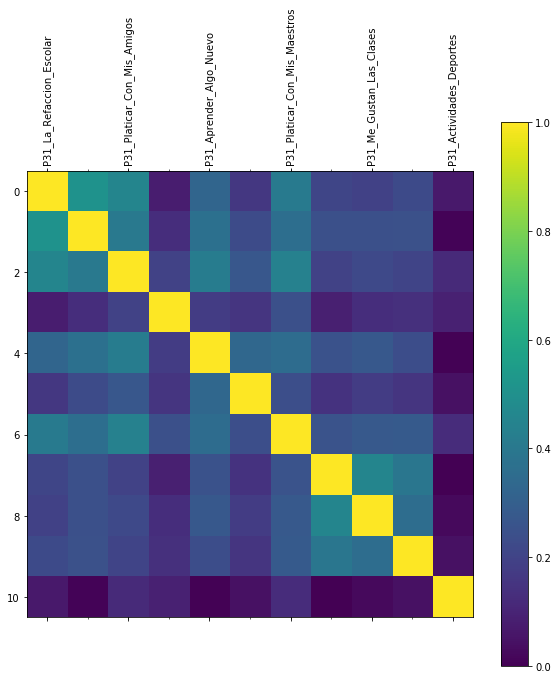

In [21]:
correlations = df.corr()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ax.set_xticks(range(len(dimensiones.keys())), dimensiones.keys())
#ax.set_xticks(range(len(dimensiones.keys())), dimensiones.keys())
ax.set_xticklabels(dimensiones.keys(), rotation=90)
# ax.set_yticklabels(rf_dimensiones.keys())
plt.show()